### import section

In [1]:
import math
import time
from typing import Dict, List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    root_mean_squared_error,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from joblib import load

### preprocessing

In [ ]:
# --- Read and preprocess data ---
try:
    X = pd.read_pickle("data/processed/calc_descriptors_final.pkl")
except FileNotFoundError:
    print("Error: 'data/processed/calc_descriptors_final.pkl' not found.")
    exit()

try:
    df = pd.read_pickle("data/processed/gap_smile.pkl")
except FileNotFoundError:
    print("Error: 'data/processed/gap_smile.pkl' not found.")
    exit()

scaler = MinMaxScaler()
X["Ipc"] = scaler.fit_transform(X["Ipc"].values.reshape(-1, 1))

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

y = df["GAP"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.3, random_state=42
)

# --- Load the trained model ---
try:
    reg = load("data/processed/reg_NN_MLP.joblib")
except FileNotFoundError:
    print("Error: 'data/processed/reg_NN_MLP.joblib' not found.")
    exit()

/home/sat/miniforge3/envs/py310hl_gaps_pub/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPRegressor from version 1.4.1.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### metrics

In [ ]:
def get_metrics(
    df: pd.DataFrame, pred_col: str, true_col: str
) -> Dict[str, float]:
    """
    Calculates regression metrics for a given DataFrame and columns.

    Args:
        df (pd.DataFrame): The input DataFrame.
        pred_col (str): The name of the column with predicted values.
        true_col (str): The name of the column with true values.

    Returns:
        dict: A dictionary containing R-squared, Mean Squared Error (MSE),
              Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).
    """
    y_pred = df[pred_col]
    y_true = df[true_col]
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)

    return {"R2": r2, "MSE": mse, "MAE": mae, "RMSE": rmse}

# --- Predict and evaluate ---
gap_pred = reg.predict(scaled_X)
df["GAP_P"] = gap_pred


In [ ]:
# --- metric analysis ---
print("\n--- General Analysis ---")
y_pred_train = reg.predict(X_train)
train_metrics = get_metrics(
    pd.DataFrame({"GAP_P": y_pred_train, "GAP": y_train}), "GAP_P", "GAP"
)
print("Train Metrics:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.4f}")

y_pred_test = reg.predict(X_test)
test_metrics = get_metrics(
    pd.DataFrame({"GAP_P": y_pred_test, "GAP": y_test}), "GAP_P", "GAP"
)
print("\nTest Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")


--- General Analysis ---
Train Metrics:
R2: 0.9669
MSE: 0.0551
MAE: 0.1733
RMSE: 0.2347

Test Metrics:
R2: 0.9456
MSE: 0.0907
MAE: 0.2121
RMSE: 0.3012


In [6]:
X=pd.read_pickle("data/processed/calc_descriptors_final.pkl")
print("n_features: ", len(X.columns))

print(X['Ipc'].max(),X['Ipc'].min())
scaler = MinMaxScaler()
X['Ipc'] = scaler.fit_transform(X['Ipc'].values.reshape(-1,1))
print(X['Ipc'].max(),X['Ipc'].min())


scaler=StandardScaler().fit(X)
scaled=scaler.transform(X)

df=pd.read_pickle("data/processed/gap_smile.pkl")
y=df["GAP"].to_numpy() #[0:100001:10]
X_train, X_test, y_train, y_test = train_test_split(scaled,y,test_size=0.3,random_state=42)

n_features:  56
219.2769658075064 1.0851048673387407
1.0 0.0


In [3]:
load_file='descr_GBR.joblib'
reg=load(load_file)

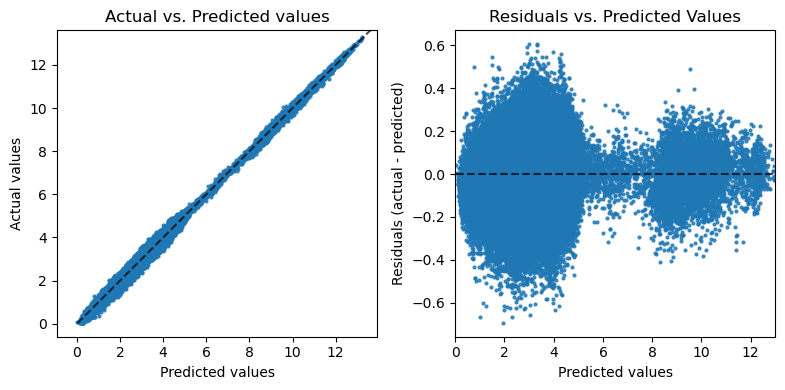

In [15]:
y_pred_train=reg.predict(X_train)

#prediction on trained molecules
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PED.from_predictions(
    y_train,
    y_pred=y_pred_train,
    kind="actual_vs_predicted",
    subsample=None,
    ax=axs[0],
    random_state=0,
    scatter_kwargs={"s":4.0}
)
axs[0].set_title("Actual vs. Predicted values")
axs[0].set_ylim(0,13)
axs[0].set_xlim(0,13)
axs[0].set_xticks(range(0,14,2))
axs[0].set_yticks(range(0,14,2))

PED.from_predictions(
    y_train,
    y_pred=y_pred_train,
    kind="residual_vs_predicted",
    subsample=None,
    ax=axs[1],
    random_state=0,
    scatter_kwargs={"s":4.0}
)
axs[1].set_title("Residuals vs. Predicted Values")
axs[1].set_xlim(0,13)
#fig.suptitle("Plotting cross-validated predictions")
#plt.title("pred vs. test")
#plt.show()

plt.savefig("PED_GBR_pred_on_trained.png")
plt.tight_layout()
plt.savefig("PED_GBR_pred_on_trained_tl.png")
#plt.clf()

In [16]:
mse = mean_squared_error(y_train, y_pred_train)
print("The mean squared error (MSE)  on test set: {:.4f}".format(mse))
rmse = root_mean_squared_error(y_train, y_pred_train)
print("The mean squared error (RMSE) on test set: {:.4f}".format(rmse))
mae = mean_absolute_error(y_train, y_pred_train)
print("The mean squared error (MAE)  on test set: {:.4f}".format(mae))

print("R2-score:",r2_score(y_pred=y_pred_train,y_true=y_train))

The mean squared error (MSE)  on test set: 0.0139
The mean squared error (RMSE) on test set: 0.1177
The mean squared error (MAE)  on test set: 0.0907
R2-score: 0.9916742934643004


/home/sat/anaconda3/envs/py312scikitlearn/lib/python3.12/site-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


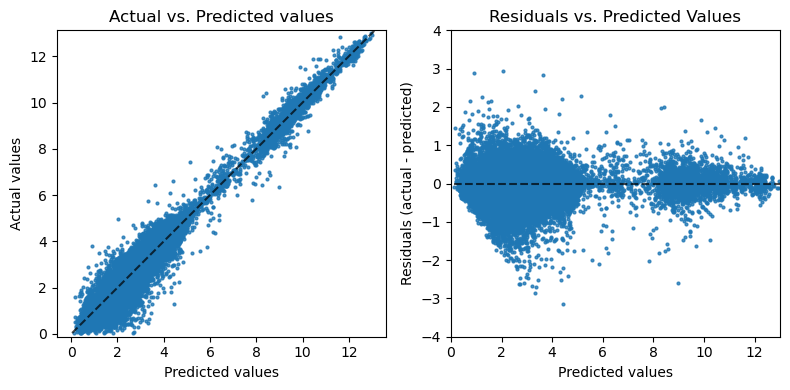

In [11]:
#prediction on untrained/test molecules
y_pred=reg.predict(X_test)

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
plt.tight_layout()
PED.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=None,
    ax=axs[0],
    random_state=0,
    scatter_kwargs={"s":4.0}
)
axs[0].set_title("Actual vs. Predicted values")
axs[0].set_ylim(0,13)
axs[0].set_xlim(0,13)
axs[0].set_xticks(range(0,14,2))
axs[0].set_yticks(range(0,14,2))

PED.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=None,
    ax=axs[1],
    random_state=0,
    scatter_kwargs={"s":4.0}
)
axs[1].set_title("Residuals vs. Predicted Values")
axs[1].set_xlim(0,13)
axs[1].set_ylim(-4,4)
#fig.suptitle("Plotting cross-validated predictions")
#plt.title("pred vs. test")
#plt.show()
plt.savefig("PED_GBR_pred_on_untrained.png")
plt.tight_layout()
plt.savefig("PED_GBR_pred_on_untrained_tl.png")

In [14]:
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE)  on test set: {:.4f}".format(mse))
rmse = root_mean_squared_error(y_test, y_pred)
print("The mean squared error (RMSE) on test set: {:.4f}".format(rmse))
mae = mean_absolute_error(y_test, y_pred)
print("The mean squared error (MAE)  on test set: {:.4f}".format(mae))

print("R2-score:",r2_score(y_pred=y_pred,y_true=y_test))

The mean squared error (MSE)  on test set: 0.0730
The mean squared error (RMSE) on test set: 0.2701
The mean squared error (MAE)  on test set: 0.1867
R2-score: 0.9562428012228215


/home/sat/anaconda3/envs/py312scikitlearn/lib/python3.12/site-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


[('EState_VSA6', 0.00016769028112372864), ('EState_VSA5', 0.0002533586761247892), ('EState_VSA4', 0.00030027576683221797), ('fr_aniline', 0.00035546111272848237), ('EState_VSA11', 0.0003571689919175693), ('fr_aryl_methyl', 0.0004306268701694323), ('fr_Al_OH_noTert', 0.0004398099196385116), ('fr_para_hydroxylation', 0.0005277236836350452), ('fr_NH2', 0.0005780459353178737), ('EState_VSA3', 0.0007431130195376715), ('fr_Ar_N', 0.001104413402410501), ('PEOE_VSA5', 0.001480804233055884), ('EState_VSA2', 0.0014830882240174821), ('NumAromaticHeterocycles', 0.0015646714728290855), ('fr_piperdine', 0.0016024953385289705), ('fr_Al_COO', 0.0016084339785770738), ('fr_ester', 0.0019736029426533157), ('fr_bicyclic', 0.0020944360754341315), ('VSA_EState10', 0.002183400973898018), ('SlogP_VSA10', 0.0023022699682205545), ('SlogP_VSA12', 0.0024094972964538723), ('NumAromaticCarbocycles', 0.0024361194223689506), ('SlogP_VSA7', 0.002516851429005792), ('PEOE_VSA4', 0.0027347392046638535), ('Ipc', 0.0034334

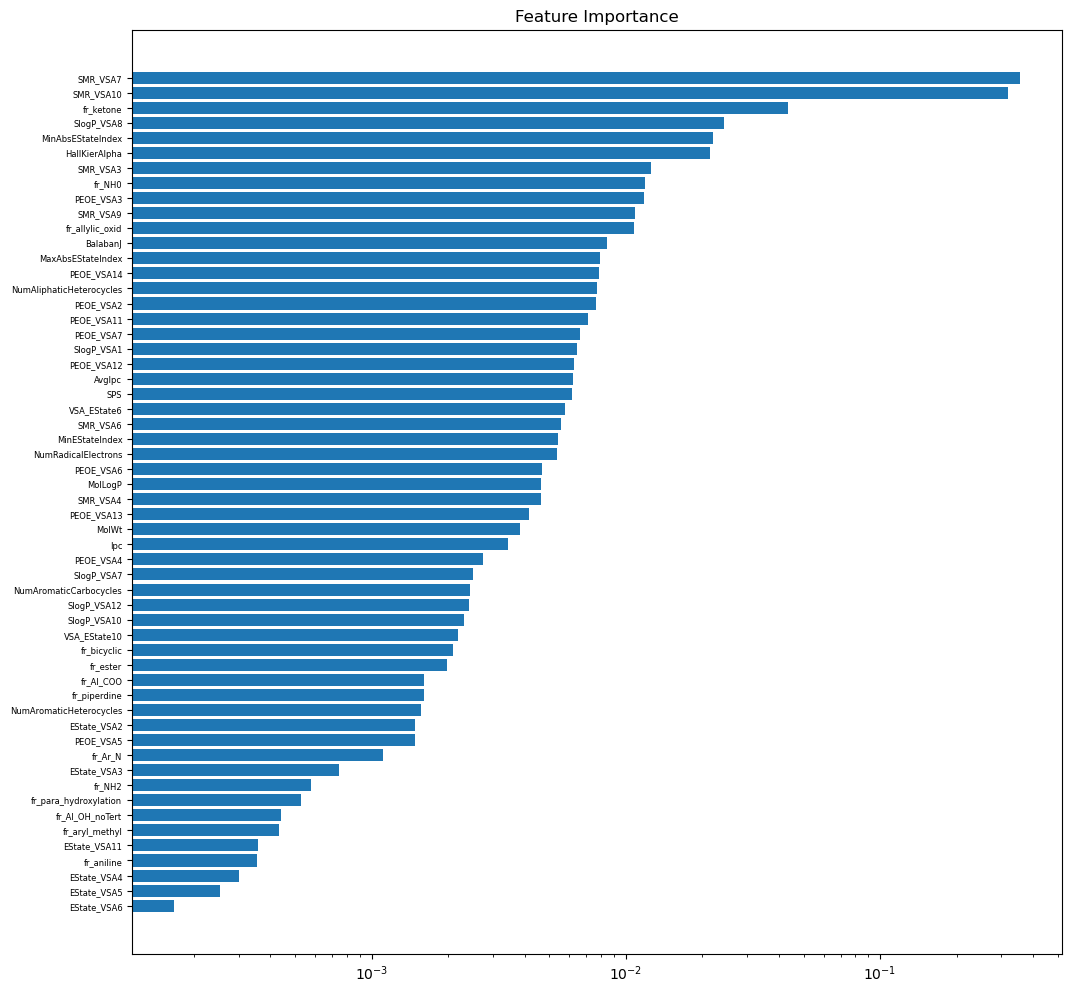

In [4]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 12))
print(list(zip(np.array(X.columns)[sorted_idx],feature_importance[sorted_idx])))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
kwargs={"fontsize":6}
plt.yticks(pos, np.array(X.columns)[sorted_idx],**kwargs)
plt.xscale("log")
plt.title("Feature Importance")
plt.savefig("feature_importance_GBR.png")

In [7]:
data=list(zip(np.array(X.columns)[sorted_idx],feature_importance[sorted_idx]))
header = ("descriptor","feature importance")
rows = data


# Sort the data by age (column 2) in descending order
sorted_rows = sorted(rows, key=lambda x: x[1], reverse=True)

# Combine the header and sorted rows
sorted_data = [header] + sorted_rows

# Create a new Word document
doc = Document()

# Add a table to the document
table = doc.add_table(rows=len(sorted_data), cols=2)

# Populate the table
for i, (col1, col2) in enumerate(sorted_data):
    table.rows[i].cells[0].text = str(col1)  # First column
    table.rows[i].cells[1].text = str(col2)  # Second column

# Save the document
doc.save("output_table_sorted.docx")

## analyse random search GBR

In [22]:
#ff=open("/home/sat/ML_GAP/GBR_descr/log2000_0.log","r")
ff=open("/home/sat/ML_GAP/GBR_descr/slurm-512835.out","r")

rr=ff.read().splitlines()
rr=[x for x in rr if "CV" in x]
rr=[x.replace("END ","") for x in rr]
rr=[x.replace("CV ","CV=") for x in rr]
rr=[x.replace("[","") for x in rr]
rr=[x.replace("]",",") for x in rr]
#rr=[x.replace("/1","") for x in rr]
rr=[x.replace("/2","") for x in rr]
rr=[x.replace(";","") for x in rr]
rr=[x.replace(")","),") for x in rr]
rr=[x.replace(",,",",") for x in rr]
#rr=[y.split("=")[1] for y in x for x in rr]
rr=[x.split("=") for x in rr]
print(rr[0])
rm_list=['CV',"learning_rate", "loss", "max_depth", "n_estimators", "subsample",'alpha', 'ccp_alpha', 'criterion', 'init','max_features','max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_iter_no_change', 'random_state', 'tol', 'validation_fraction', 'verbose', 'warm_start',"score","test","train","time","total","min",",","\(","\)",]
#rm_list=["CV","alpha","beta_1","hidden_layer_sizes","max_iter","n_iter_no_change","tol","score","test","train","time","total","min",",","\(","\)","s"]
for nrun,run in enumerate(rr):
    for num,item in enumerate(run):
        for rm in rm_list:
            item=re.sub(rm,"",item)
        run[num]=item
    rr[nrun]=list(filter(None,run))
rr

/tmp/ipykernel_19051/4287925565.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/sat/ML_GAP/GBR_descr/slurm-512835.out' mode='r' encoding='UTF-8'>
  ff=open("/home/sat/ML_GAP/GBR_descr/slurm-512835.out","r")


['CV', '1, learning_rate', '0.049932924209851834, loss', 'squared_error, max_depth', '9, n_estimators', '1014, subsample', '0.22904180608409974, score', '(train', '0.974, test', '0.940), total time', '18.3min']


[['1 ',
  '0.049932924209851834 ',
  'squared_error ',
  '9 ',
  '1014 ',
  '0.22904180608409974 ',
  '0.974 ',
  '0.940  ',
  '18.3'],
 ['2 ',
  '0.049932924209851834 ',
  'squared_error ',
  '9 ',
  '1014 ',
  '0.22904180608409974 ',
  '0.975 ',
  '0.940  ',
  '18.7'],
 ['1 ',
  '0.05058265802441404 ',
  'squared_error ',
  '12 ',
  '1035 ',
  '0.2115312125207079 ',
  '0.991 ',
  '0.943  ',
  '22.3'],
 ['2 ',
  '0.05058265802441404 ',
  'squared_error ',
  '12 ',
  '1035 ',
  '0.2115312125207079 ',
  '0.991 ',
  '0.942  ',
  '22.5'],
 ['1 ',
  '0.04623873301291946 ',
  'squared_error ',
  '9 ',
  '987 ',
  '0.38318092164684586 ',
  '0.979 ',
  '0.944  ',
  '30.0'],
 ['2 ',
  '0.04623873301291946 ',
  'squared_error ',
  '9 ',
  '987 ',
  '0.38318092164684586 ',
  '0.979 ',
  '0.943  ',
  '31.3'],
 ['2 ',
  '0.03061695553391381 ',
  'squared_error ',
  '11 ',
  '1076 ',
  '0.5087407548138583 ',
  '0.990 ',
  '0.947  ',
  '53.0'],
 ['1 ',
  '0.03061695553391381 ',
  'squared_error ',
 

In [31]:
pd.set_option("display.precision", 7)
pd.set_option('display.min_rows', 40)
cols= ["CV","learning_rate", "loss", "max_depth", "n_estimators", "subsample","score_train","score_test","time"] #["learning_rat", "loss=absolute_error", "max_depth", "n_estimators", "subsample"]
dty={"CV":np.int16,
     "learning_rate":np.float32,
     "loss":str,
     "max_depth":np.int16,
     "n_estimators":np.int16,
     "subsample":np.float32,
     "score_train":np.float32,
     "score_test":np.float32,
     "time":np.float32
    }
frame=pd.DataFrame(data=rr, columns=cols)#,dtype=dty)
frame=frame.astype(dtype=dty)
frame['r2_residuals']=frame['score_train']-frame['score_test']
#frame["hidden_layers"]=[x.split() for x in frame["hidden_layers"]]
#frame["hidden_layers"]=[[int(y) for y in x] for x in frame["hidden_layers"]]
#frame["hl_sum"]=[sum(x) for x in frame["hidden_layers"]]
#frame["hl_len"]=[len(x) for x in frame["hidden_layers"]]
print(len(frame)/4)
#frame.sort_values(by='score_test',ascending=False)
frame.loc[frame['score_test']>=0.94].sort_values(by=['r2_residuals','score_test'],ascending=True)

1000.0


,CV,learning_rate,loss,max_depth,n_estimators,subsample,score_train,score_test,time,r2_residuals
1714,1,0.0249118,squared_error,8,1177,0.5644906,0.964,0.940,48.4000015,0.024
1932,1,0.0293960,squared_error,8,1017,0.5480781,0.964,0.940,40.0000000,0.024
1563,1,0.0366050,squared_error,8,832,0.5695133,0.965,0.940,34.7999992,0.025
1699,1,0.0334510,squared_error,8,938,0.5142170,0.965,0.940,35.0999985,0.025
1782,1,0.0310242,squared_error,8,1036,0.5086245,0.965,0.940,38.7999992,0.025
2039,1,0.0277463,squared_error,9,830,0.3512098,0.965,0.940,23.3999996,0.025
3294,1,0.0278380,squared_error,8,1066,0.6163469,0.965,0.940,48.2999992,0.025
3454,1,0.0267012,squared_error,8,1082,0.6735765,0.965,0.940,52.2000008,0.025
3758,1,0.0349463,squared_error,8,848,0.6830108,0.965,0.940,42.0000000,0.025
3998,1,0.0315490,squared_error,8,941,0.6257446,0.965,0.940,34.4000015,0.025


In [36]:
df_avg=frame.drop("loss",axis=1).sort_values(by='learning_rate',ascending=False).groupby(np.arange(len(frame.index))//2).mean()
df_avg.sort_values(by='score_test',ascending=False)

,CV,learning_rate,max_depth,n_estimators,subsample,score_train,score_test,time,r2_residuals
1486,1.5,0.0321080,12.0,1171.0,0.6917115,0.9960000,0.9480000,85.0500031,0.0480
1354,1.5,0.0353765,12.0,1164.0,0.6249797,0.9960000,0.9480000,77.1500015,0.0480
1283,1.5,0.0372967,11.0,1181.0,0.6938248,0.9940000,0.9480000,81.1499939,0.0460
1671,1.5,0.0276208,12.0,1159.0,0.5842999,0.9940000,0.9480000,71.1999969,0.0460
448,1.5,0.0586159,10.0,1105.0,0.6260908,0.9930000,0.9475000,62.7500000,0.0455
1024,1.5,0.0432518,12.0,1046.0,0.5719526,0.9970000,0.9475000,63.2500000,0.0495
1680,1.5,0.0274172,12.0,1041.0,0.6825594,0.9940000,0.9475000,73.8000031,0.0465
1469,1.5,0.0326323,12.0,1049.0,0.4609765,0.9940000,0.9475000,50.4000015,0.0465
1019,1.5,0.0433990,12.0,1044.0,0.6088117,0.9970000,0.9475000,66.9000015,0.0495
1679,1.5,0.0274500,12.0,875.0,0.5924485,0.9920000,0.9475000,53.4000015,0.0445


In [ ]:
 #datetime.timedelta(minutes=2.9)

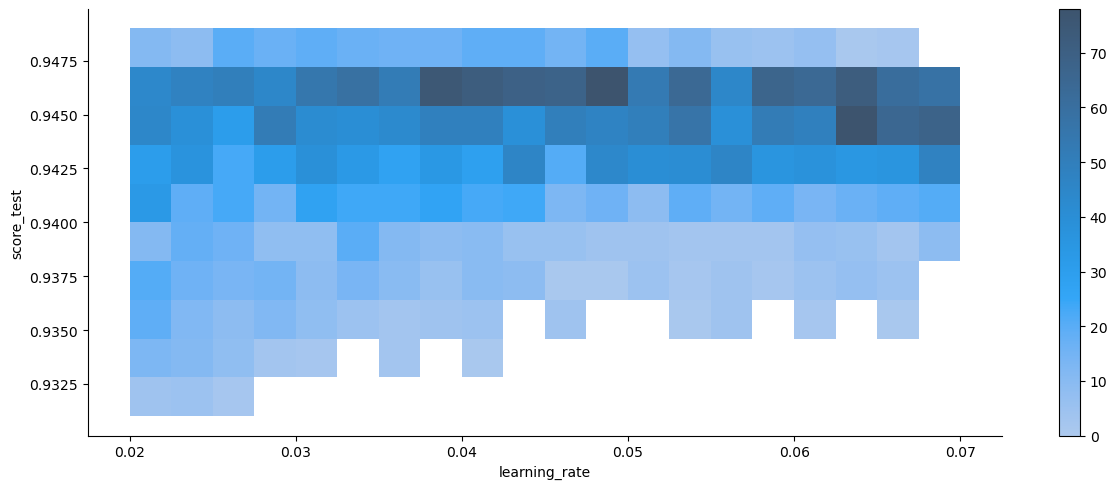

In [37]:
kwargs={"discrete":(False,False), "bins":(20,10),"cbar":True}
plot=sns.displot(frame, x="learning_rate",y="score_test",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)

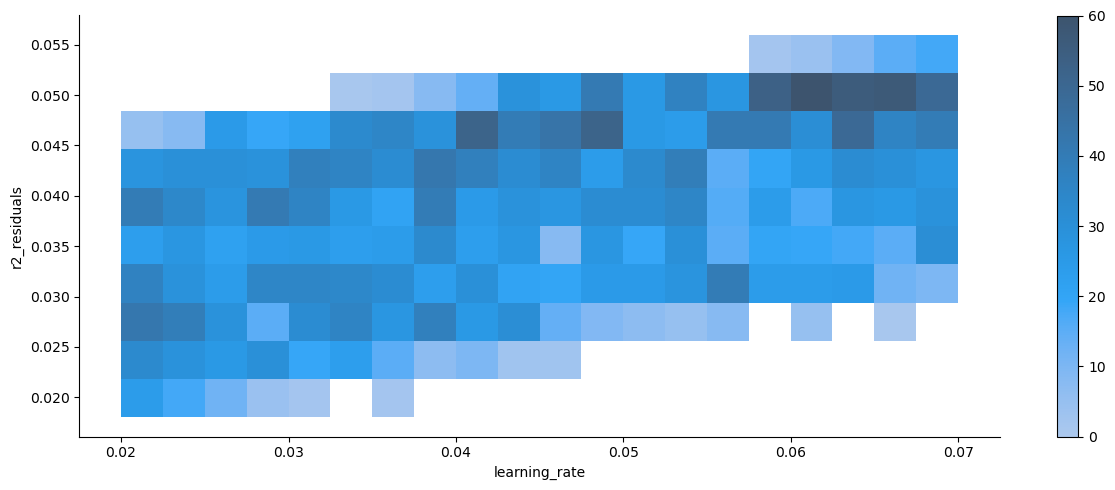

In [42]:
kwargs={"discrete":(False,False), "bins":(20,10),"cbar":True}
plot=sns.displot(frame, x="learning_rate",y="r2_residuals",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)

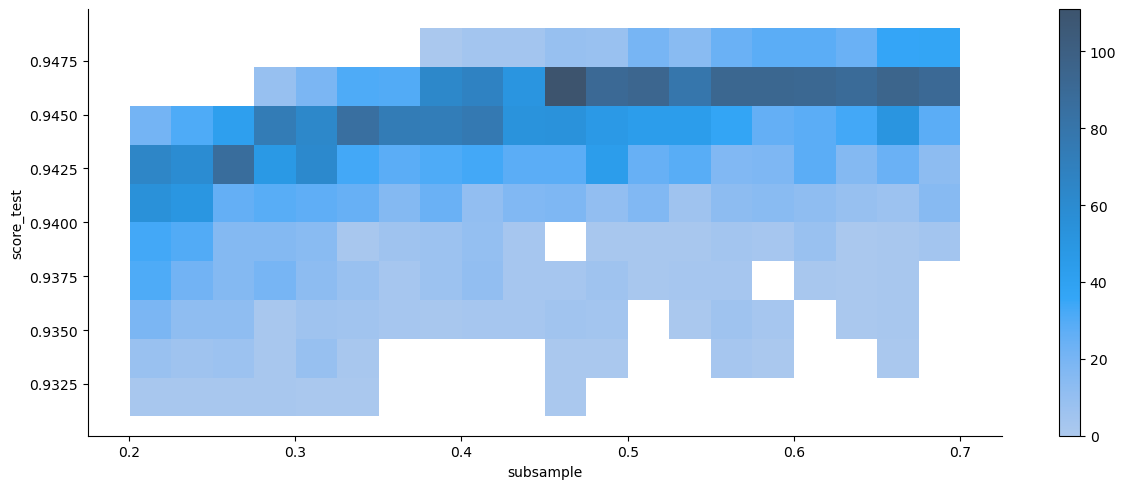

In [38]:
kwargs={"discrete":(False,False), "bins":(20,10),"cbar":True}
plot=sns.displot(frame, x="subsample",y="score_test",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)

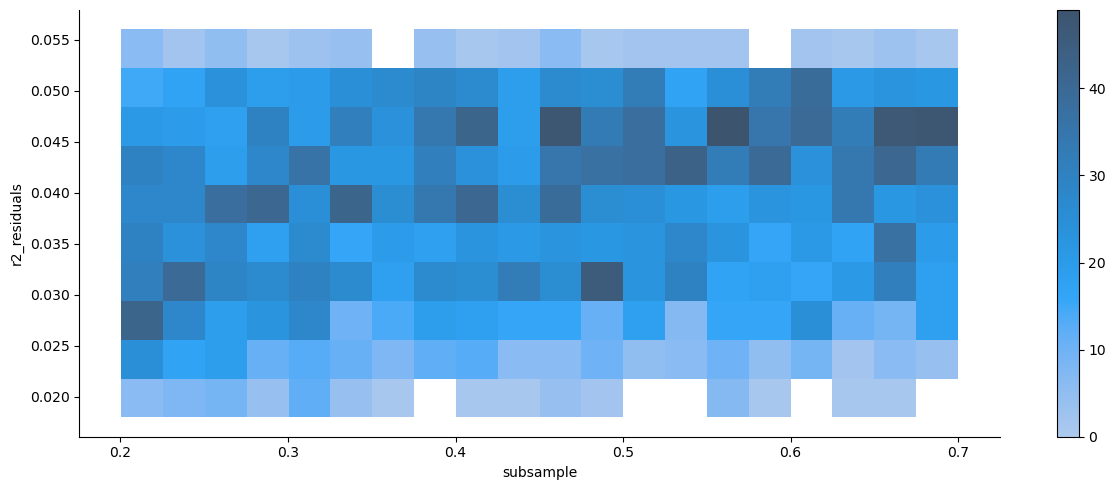

In [43]:
kwargs={"discrete":(False,False), "bins":(20,10),"cbar":True}
plot=sns.displot(frame, x="subsample",y="r2_residuals",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)

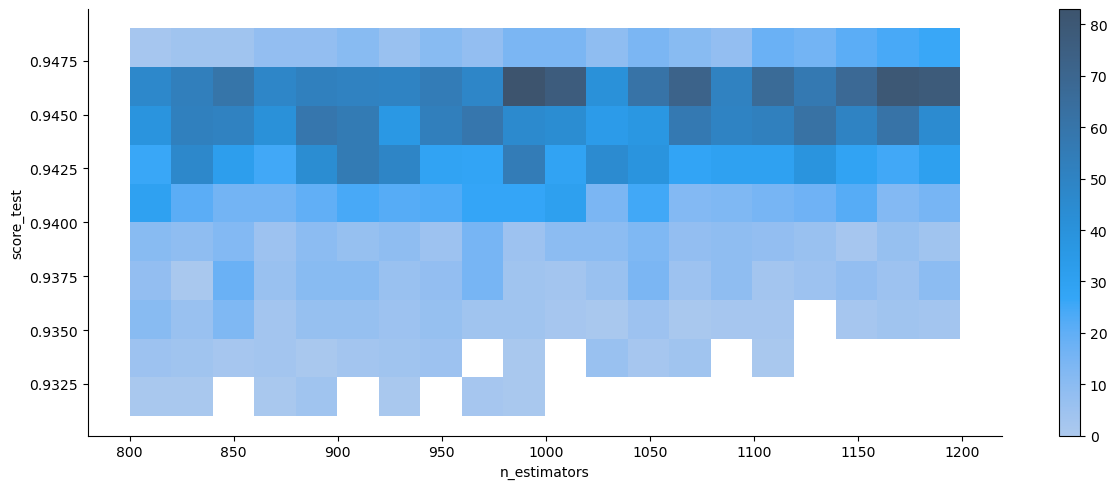

In [39]:
kwargs={"discrete":(False,False), "bins":(20,10),"cbar":True}
plot=sns.displot(frame, x="n_estimators",y="score_test",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)
#plot.set(ylim=(0.93,0.95))

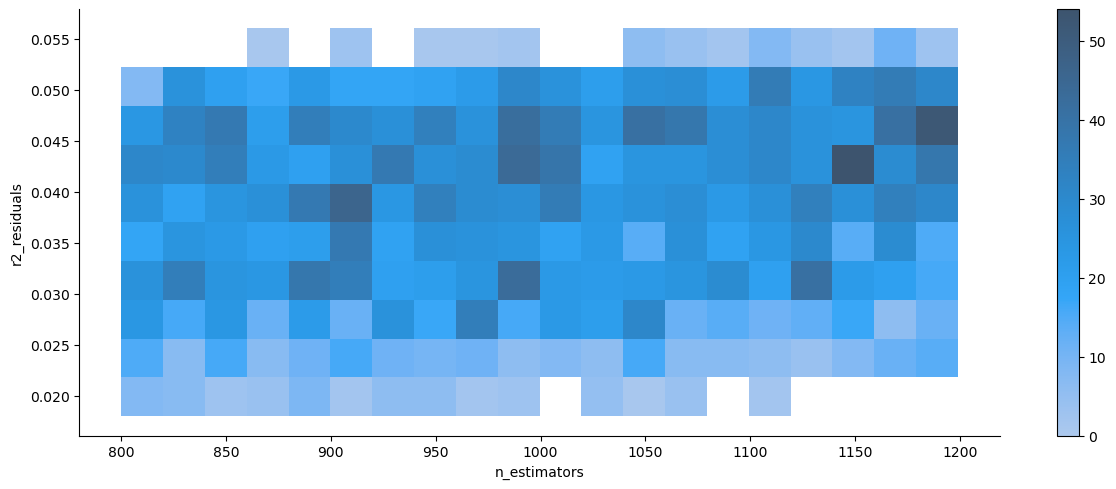

In [45]:
kwargs={"discrete":(False,False), "bins":(20,10),"cbar":True}
plot=sns.displot(frame, x="n_estimators",y="r2_residuals",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)

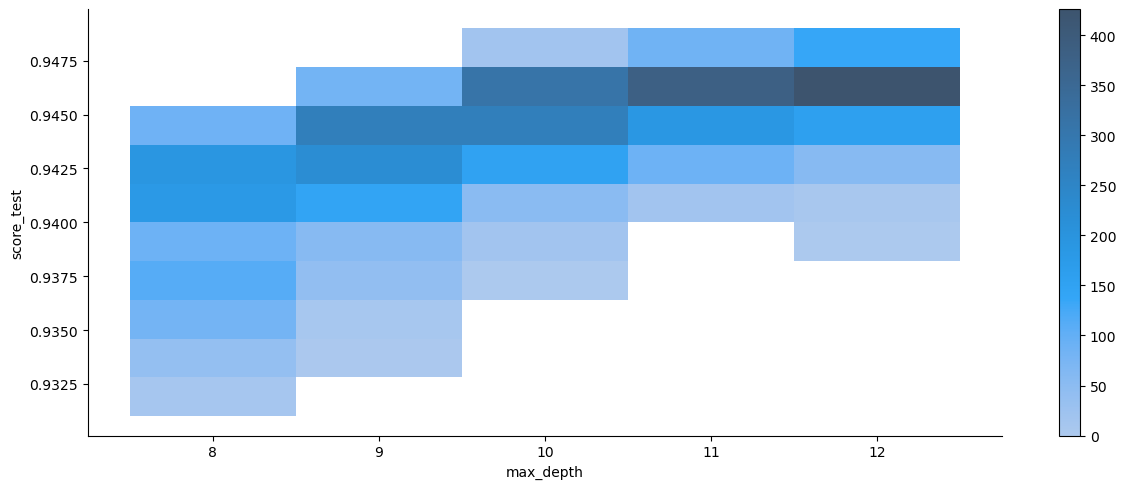

In [40]:
kwargs={"discrete":(True,False), "bins":(20,10),"cbar":True}
plot=sns.displot(frame, x="max_depth",y="score_test",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)
#plot.set(ylim=(0.85,0.96))

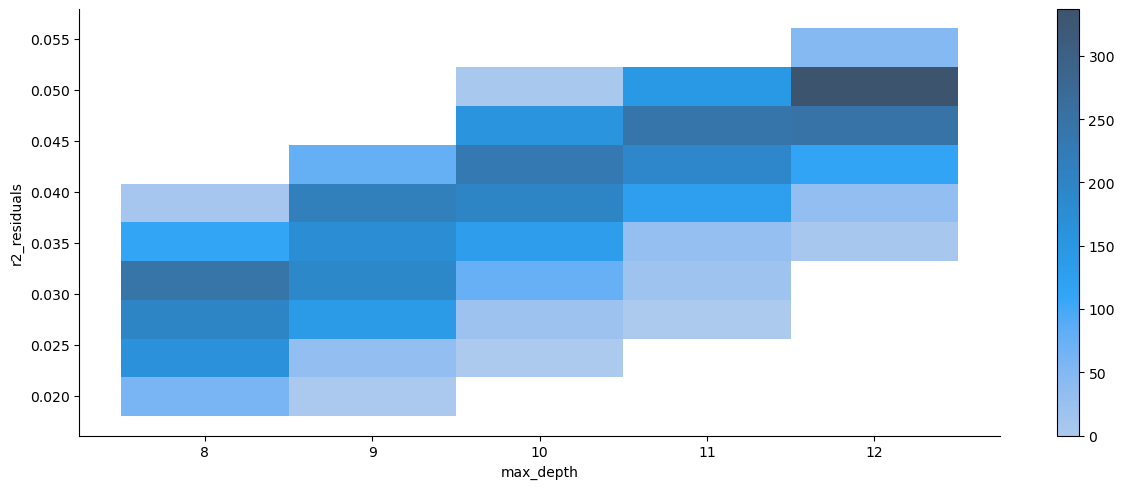

In [46]:
kwargs={"discrete":(True,False), "bins":(20,10),"cbar":True}
plot=sns.displot(frame, x="max_depth",y="r2_residuals",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)
#plot.set(ylim=(0.85,0.96))

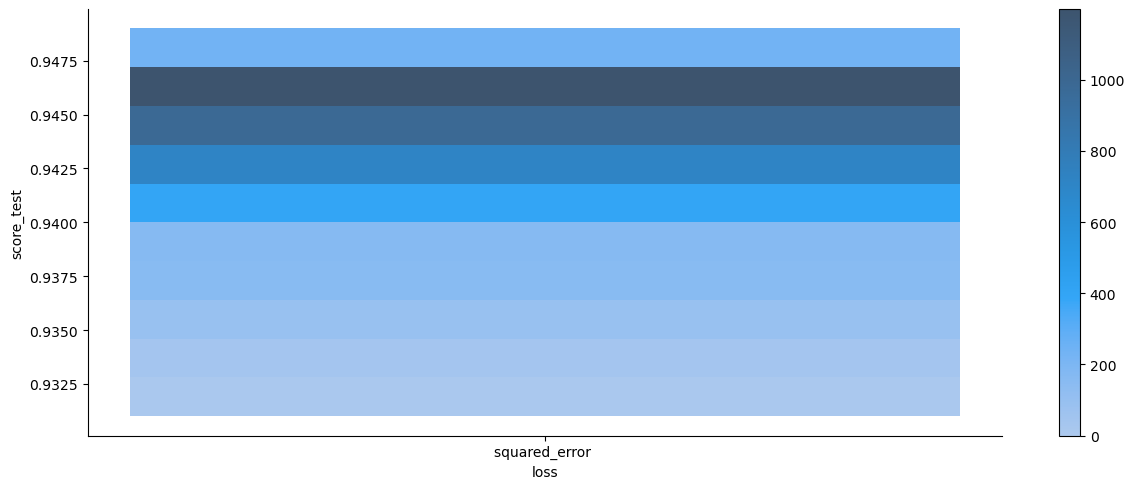

In [41]:
kwargs={"discrete":(True,False), "bins":(2,10),"cbar":True}
plot=sns.displot(frame, x="loss",y="score_test",height=5, aspect=2.5,legend=True,kind='hist',**kwargs)
#plot.set(ylim=(0.85,0.95))